In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.ConvNet.ConvNet import *
from NN_library.AutoUnet.AutoUnet import *
from NN_library.ConvNet.train_ConvNet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda
Using device: cuda


Test U-Net

In [2]:
data = dataset_seq()
loaders = get_loaders(data, 1)

In [16]:
name = 'NN_library/ConvNet/Conv_w_AutoUnet_norm'
args = {'lr' : 0.001, 'epochs' : 20, 'dev' : dev, 'name' : name}
net = ConvNet(16)
net = load_network(net, args['name'], args)

In [4]:
L_stiff, L_shr = test(net, loaders, args)
L_shr = np.array(L_shr)
L_stiff = np.array(L_stiff)

In [5]:
shr_mean = L_shr.sum(axis=1).mean()
shr_std = L_shr.sum(axis=1).std()
stiff_mean = L_stiff.sum(axis=1).mean()
stiff_std = L_stiff.sum(axis=1).std()
print(shr_mean, shr_std)
print(stiff_mean, stiff_std)

0.09327873 0.07224837
0.13899639 0.087980814


In [6]:
shr_mean = np.mean(L_shr, axis=0)
shr_std = np.std(L_shr, axis=0)
stiff_mean = np.mean(L_stiff, axis=0)
stiff_std = np.std(L_stiff, axis=0)

In [7]:
print(shr_mean, '\n', shr_std)
print(stiff_mean, '\n', stiff_std)

[0.00550901 0.00522478 0.00570205 0.00719419 0.00876048 0.01006587
 0.01130141 0.01234668 0.01317499 0.01399931] 
 [0.00462834 0.00437278 0.00484807 0.00636729 0.00778265 0.00867303
 0.00953454 0.01038951 0.01111915 0.01181541]
[3.2058564e-05 1.1412670e-03 6.0417424e-03 1.1320029e-02 1.4923586e-02
 1.7502401e-02 1.9744845e-02 2.1300389e-02 2.2791905e-02 2.4198204e-02] 
 [2.2409406e-05 1.0631941e-03 6.1654756e-03 9.9596987e-03 1.2434828e-02
 1.4967157e-02 1.7244505e-02 1.7823739e-02 1.9708009e-02 2.1612875e-02]


Text(0, 0.5, 'Stiffness loss')

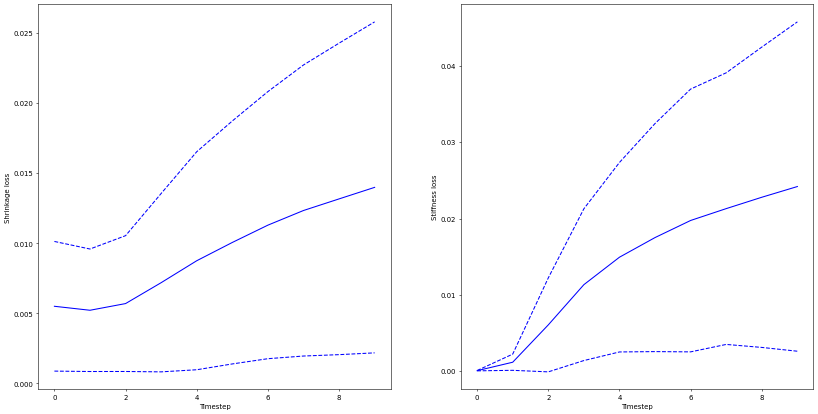

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=50)

axs.flat[0].plot(shr_mean, 'b')
axs.flat[0].plot(shr_mean+shr_std, 'b--')
axs.flat[0].plot(shr_mean-shr_std, 'b--')
axs.flat[0].set_xlabel('Timestep')
axs.flat[0].set_ylabel('Shrinkage loss')

axs.flat[1].plot(stiff_mean, 'b')
axs.flat[1].plot(stiff_mean+stiff_std, 'b--')
axs.flat[1].plot(stiff_mean-stiff_std, 'b--')
axs.flat[1].set_xlabel('Timestep')
axs.flat[1].set_ylabel('Stiffness loss')

In [17]:
unet = AutoUNet()
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_w_Conv_norm', args)

In [18]:
L_stiff, L_shr = test_w_Auto(unet, net, loaders, args)
L_shr = np.array(L_shr)
L_stiff = np.array(L_stiff)
shr_mean = L_shr.sum(axis=1).mean()
shr_std = L_shr.sum(axis=1).std()
stiff_mean = L_stiff.sum(axis=1).mean()
stiff_std = L_stiff.sum(axis=1).std()
print(shr_mean, shr_std)
print(stiff_mean, stiff_std)

0.091134034 0.069146335
0.1413538 0.08908996


In [19]:
shr_mean = np.mean(L_shr, axis=0)
shr_std = np.std(L_shr, axis=0)
stiff_mean = np.mean(L_stiff, axis=0)
stiff_std = np.std(L_stiff, axis=0)
print(shr_mean, '\n', shr_std)
print(stiff_mean, '\n', stiff_std)

[0.00564353 0.00515368 0.00555449 0.00701727 0.00841728 0.00981719
 0.01100106 0.01200102 0.01285548 0.01367302] 
 [0.00455027 0.00434633 0.00466059 0.00606681 0.00716777 0.00832768
 0.00928329 0.01015718 0.01083329 0.01151419]
[3.17063241e-05 1.16437313e-03 6.16188068e-03 1.14780525e-02
 1.49721988e-02 1.76673438e-02 2.00326294e-02 2.15472709e-02
 2.33366247e-02 2.49616895e-02] 
 [2.2205364e-05 1.0777098e-03 6.1478661e-03 9.9287536e-03 1.2561518e-02
 1.5232908e-02 1.7594764e-02 1.8181905e-02 1.9998215e-02 2.2060910e-02]


Text(0, 0.5, 'Stiffness loss')

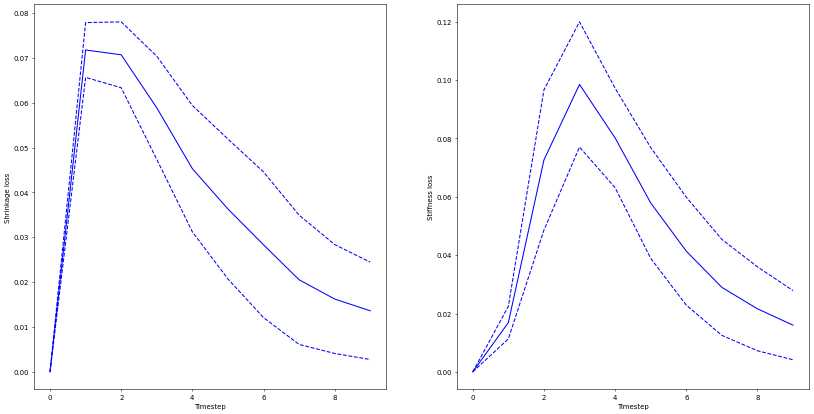

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=50)

axs.flat[0].plot(shr_mean, 'b')
axs.flat[0].plot(shr_mean+shr_std, 'b--')
axs.flat[0].plot(shr_mean-shr_std, 'b--')
axs.flat[0].set_xlabel('Timestep')
axs.flat[0].set_ylabel('Shrinkage loss')

axs.flat[1].plot(stiff_mean, 'b')
axs.flat[1].plot(stiff_mean+stiff_std, 'b--')
axs.flat[1].plot(stiff_mean-stiff_std, 'b--')
axs.flat[1].set_xlabel('Timestep')
axs.flat[1].set_ylabel('Stiffness loss')